# 1.10. Decision Trees
Decision Trees (DTs) are a **non-parametric supervised learning** method used for **classification** and **regression**. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz

## 1.10.1. Classification

In [2]:
from sklearn import tree
print(dir(tree.DecisionTreeClassifier))
print(tree.DecisionTreeClassifier())

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_cache', '_abc_negative_cache', '_abc_negative_cache_version', '_abc_registry', '_estimator_type', '_get_param_names', '_validate_X_predict', 'apply', 'decision_path', 'feature_importances_', 'fit', 'get_params', 'predict', 'predict_log_proba', 'predict_proba', 'score', 'set_params']
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_s

In [3]:
print(tree.DecisionTreeClassifier.__doc__)

A decision tree classifier.

    Read more in the :ref:`User Guide <tree>`.

    Parameters
    ----------
    criterion : string, optional (default="gini")
        The function to measure the quality of a split. Supported criteria are
        "gini" for the Gini impurity and "entropy" for the information gain.

    splitter : string, optional (default="best")
        The strategy used to choose the split at each node. Supported
        strategies are "best" to choose the best split and "random" to choose
        the best random split.

    max_depth : int or None, optional (default=None)
        The maximum depth of the tree. If None, then nodes are expanded until
        all leaves are pure or until all leaves contain less than
        min_samples_split samples.

    min_samples_split : int, float, optional (default=2)
        The minimum number of samples required to split an internal node:

        - If int, then consider `min_samples_split` as the minimum number.
        - If floa

- array X, sparse or dense, of size `[n_samples, n_features]`
- array Y of integer values, size `[n_samples]`, holding the class labels

In [4]:
from sklearn import tree
X = [[0,0], [1,1]]
Y = [0,1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,Y)

In [5]:
clf.predict([[2,2]])

array([1])

In [6]:
clf.predict_proba([[2,2]])

array([[ 0.,  1.]])

In [7]:
X = [[0,0], [1,1], [2,2]]
Y = [0,1,2]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [8]:
clf.predict([[2,2]])

array([2])

In [9]:
clf.predict_proba([[2,2]])

array([[ 0.,  0.,  1.]])

In [10]:
X = [[0,0], [1,1], [5,2]]
Y = [0,1,2]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [11]:
clf.predict([[2,2]])

array([2])

In [12]:
clf.predict_proba([[2,2]])

array([[ 0.,  0.,  1.]])

In [13]:
X = [[0,0], [1,1], [5,2]]
Y = ['a','b','c']
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [14]:
clf.predict([[2,2]])

array(['c'],
      dtype='<U1')

In [15]:
clf.predict_proba([[2,2]])

array([[ 0.,  0.,  1.]])

### Iris example

In [16]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

In [17]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [18]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [19]:
print(dir(tree.export_graphviz))
print(tree.export_graphviz.__doc__)

['__annotations__', '__call__', '__class__', '__closure__', '__code__', '__defaults__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__get__', '__getattribute__', '__globals__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__kwdefaults__', '__le__', '__lt__', '__module__', '__name__', '__ne__', '__new__', '__qualname__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__']
Export a decision tree in DOT format.

    This function generates a GraphViz representation of the decision tree,
    which is then written into `out_file`. Once exported, graphical renderings
    can be generated using, for example::

        $ dot -Tps tree.dot -o tree.ps      (PostScript format)
        $ dot -Tpng tree.dot -o tree.png    (PNG format)

    The sample counts that are shown are weighted with any sample_weights that
    might be present.

    Read more in the :ref:`User Guide <tree>`.

    Parameters


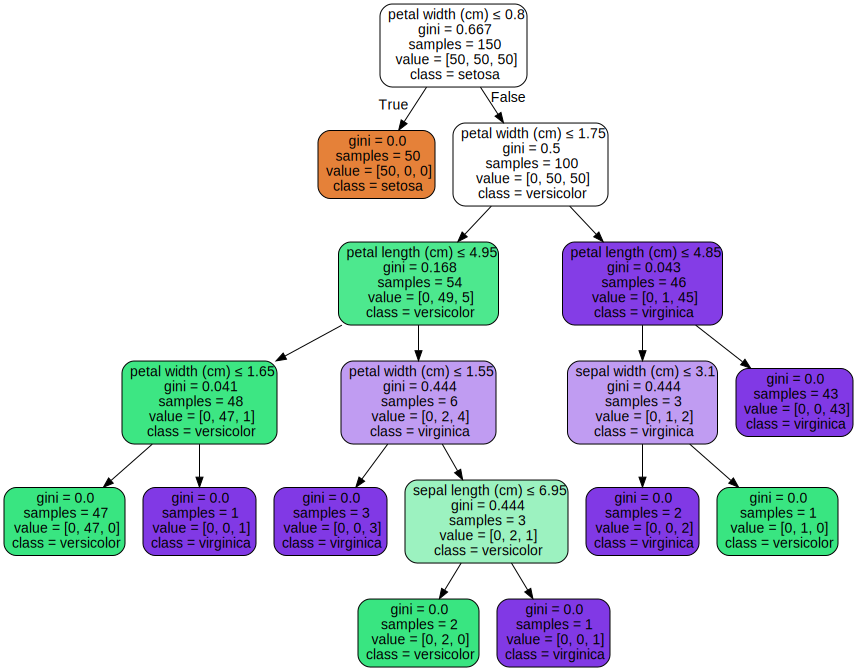

In [20]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=iris.feature_names, 
                                class_names=iris.target_names, 
                                filled=True, rounded=True, 
                                special_characters=True)  

graph = graphviz.Source(dot_data)  
graph

Convert iris into pandas DF, to inspect the decision tree

In [21]:
iris_pd = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
iris_pd.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [22]:
# level 1: This confirms all setosa has petal length <= 2.45
condition1 = iris_pd['petal length (cm)'] <= 2.45
iris_pd[condition1]['target'].value_counts()

0.0    50
Name: target, dtype: int64

In [23]:
# Level 2 class = versicolor
condition2 = iris_pd['petal width (cm)'] <= 1.75
iris_pd[(~condition1) & (condition2)]['target'].value_counts()

1.0    49
2.0     5
Name: target, dtype: int64

In [24]:
# Level 2 class = virginica
condition2 = iris_pd['petal width (cm)'] <= 1.75
iris_pd[(~condition1) & (~condition2)]['target'].value_counts()

2.0    45
1.0     1
Name: target, dtype: int64

Given a random sample, find out the sample's class

In [25]:
iris.data[:1, :]

array([[ 5.1,  3.5,  1.4,  0.2]])

In [26]:
clf.predict(iris.data[:1, :])

array([0])

In [27]:
clf.predict_proba(iris.data[:1, :])

array([[ 1.,  0.,  0.]])

## Plot the decision surface of a decision tree on the iris dataset

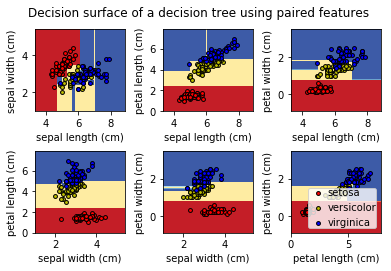

In [28]:
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], 
                                [1, 2], [1, 3], [2, 3]]):
    # print(pairidx, pair)
    
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target
    # print(X)
    # print(y)

    # Train
    clf = tree.DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, 
                    label=iris.target_names[i], 
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

## 1.10.2. Regression

In [29]:
from sklearn import tree
X = [[0,0], [2,2]]
y = [0.5,2.5]
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X,y)
clf.predict([[1,1]])

array([ 0.5])

## Decision Tree Regression

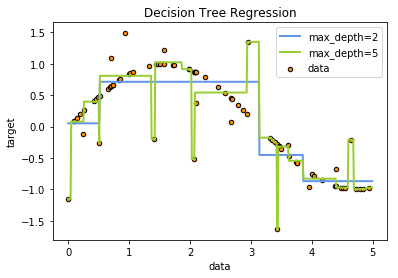

In [30]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = tree.DecisionTreeRegressor(max_depth=2)
regr_2 = tree.DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", 
         label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()